In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pwd


'C:\\Users\\rashm'

In [3]:
data= pd.read_csv(r"C:\Users\rashm\OneDrive\Desktop\5082\TerrorismP.csv", encoding='ISO-8859-1', low_memory=False)
data.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [5]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
data.dtypes

eventid       float64
iyear           int64
imonth          int64
iday            int64
approxdate     object
               ...   
INT_LOG         int64
INT_IDEO        int64
INT_MISC        int64
INT_ANY         int64
related        object
Length: 135, dtype: object

In [7]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [8]:
#Rename columns

In [8]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','latitude':'Latitude','longitude':'Longitude','country_txt':'Country','success' : 'Success',
       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Deaths','nwound':'Injuries',
       'summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive',
         'suicide': 'suicide', 'natlty1': 'nationality'},
       inplace=True)
data['Casualities']=data['Deaths']+data['Injuries']
data=data[['Year','Month','Day','Country','Region','city', 'Success','Latitude','Longitude','AttackType','Deaths',
       'Injuries','Target','Summary','Group','Target_type','Weapon_type','Motive', 'suicide', 'nationality', 'Casualities']]




In [12]:
data.head(100)

,Year,Month,Day,Country,Region,city,Success,Latitude,Longitude,AttackType,...,Injuries,Target,Summary,Group,Target_type,Weapon_type,Motive,suicide,nationality,Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,1,18.456792,-69.951164,Assassination,...,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,0,58.0,1.0
1,1970,0,0,Mexico,North America,Mexico city,1,19.371887,-99.086624,Hostage Taking (Kidnapping),...,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0,21.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,1,15.478598,120.599741,Assassination,...,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,0,217.0,1.0
3,1970,1,0,Greece,Western Europe,Athens,1,37.997490,23.762728,Bombing/Explosion,...,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0,217.0,NaN
4,1970,1,0,Japan,East Asia,Fukouka,1,33.580412,130.396361,Facility/Infrastructure Attack,...,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0,217.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1970,2,28,Jordan,Middle East & North Africa,Hebron,1,31.530243,35.094162,Armed Assault,...,NaN,Tourist Bus,NaN,Unknown,Tourists,Firearms,NaN,0,102.0,NaN
96,1970,3,0,Philippines,Southeast Asia,Manila,1,14.596051,120.978666,Bombing/Explosion,...,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0,217.0,0.0
97,1970,3,1,Italy,Western Europe,Rome,0,41.890961,12.490069,Bombing/Explosion,...,0.0,Ethopian Airliner,NaN,Eritrean Liberation Front,Airports & Aircraft,Explosives,NaN,0,65.0,0.0
98,1970,3,1,United States,North America,Boulder,1,40.007581,-105.265942,Bombing/Explosion,...,0.0,Air Force R.O.T.C. at University of Colorado,3/1/1970: Unknown perpetrators bombed the offi...,Student Radicals,Military,Explosives,Protest the Vietnam War and the R.O.T.C.,0,217.0,0.0


In [9]:
data.tail(100)

,Year,Month,Day,Country,Region,city,Success,Latitude,Longitude,AttackType,...,Injuries,Target,Summary,Group,Target_type,Weapon_type,Motive,suicide,nationality,Casualities
181591,2017,12,28,Egypt,Middle East & North Africa,Beir al-Abd,1,31.016779,33.008587,Bombing/Explosion,...,3.0,Convoy,12/28/2017: An explosive device detonated targ...,Sinai Province of the Islamic State,Military,Explosives,NaN,0,60.0,9.0
181592,2017,12,28,Egypt,Middle East & North Africa,Arish,1,31.126646,33.800865,Armed Assault,...,0.0,Officers,12/28/2017: Assailants fired a rocket-propelle...,Sinai Province of the Islamic State,Police,Explosives,NaN,0,60.0,5.0
181593,2017,12,28,Thailand,Southeast Asia,Ban Sawor Hilae,1,6.435744,101.502134,Bombing/Explosion,...,0.0,Patrol,12/28/2017: An explosive device detonated targ...,Separatists,Military,Explosives,"The specific motive is unknown; however, sourc...",0,205.0,0.0
181594,2017,12,28,Iraq,Middle East & North Africa,Bazol,1,34.018276,44.965020,Bombing/Explosion,...,1.0,Farmers,12/28/2017: An explosive device detonated near...,Unknown,Private Citizens & Property,Explosives,NaN,0,95.0,1.0
181595,2017,12,28,Iraq,Middle East & North Africa,Al-Awamer,1,34.432168,44.935032,Unknown,...,0.0,al-Awamer Village,"12/28/2017: Assailants attacked Al-Awamer, Diy...",Islamic State of Iraq and the Levant (ISIL),Private Citizens & Property,Unknown,NaN,0,95.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,1,2.359673,45.385034,Armed Assault,...,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN,0,182.0,3.0
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,1,35.407278,35.942679,Bombing/Explosion,...,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN,0,167.0,9.0
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,1,6.900742,124.437908,Facility/Infrastructure Attack,...,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN,0,160.0,0.0
181689,2017,12,31,India,South Asia,Imphal,0,24.798346,93.940430,Bombing/Explosion,...,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN,0,92.0,0.0


In [10]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
Success             0
Latitude         4556
Longitude        4557
AttackType          0
Deaths          10313
Injuries        16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
suicide             0
nationality      1559
Casualities     16874
dtype: int64

In [15]:
data.dtypes

Year             int64
Month            int64
Day              int64
Country         object
Region          object
city            object
Success          int64
Latitude       float64
Longitude      float64
AttackType      object
Deaths         float64
Injuries       float64
Target          object
Summary         object
Group           object
Target_type     object
Weapon_type     object
Motive          object
suicide          int64
nationality    float64
Casualities    float64
dtype: object

In [11]:
data.describe()

,Year,Month,Day,Success,Latitude,Longitude,Deaths,Injuries,suicide,nationality,Casualities
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,181691.000000,180132.000000,164817.000000
mean,2002.638997,6.467277,15.505644,0.889598,23.498343,-4.586957e+02,2.403272,3.167668,0.036507,127.686441,5.296128
std,13.259430,3.388303,8.814045,0.313391,18.569242,2.047790e+05,11.545741,35.949392,0.187549,89.299120,42.069023
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,4.000000,0.000000
25%,1991.000000,4.000000,8.000000,1.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000,83.000000,0.000000
50%,2009.000000,6.000000,15.000000,1.000000,31.467463,4.324651e+01,0.000000,0.000000,0.000000,101.000000,1.000000
75%,2014.000000,9.000000,23.000000,1.000000,34.685087,6.871033e+01,2.000000,2.000000,0.000000,173.000000,4.000000
max,2017.000000,12.000000,31.000000,1.000000,74.633553,1.793667e+02,1570.000000,8191.000000,1.000000,1004.000000,9574.000000


In [12]:
mean=data['Deaths'].mean()
data['Deaths'].replace(np.nan,mean, inplace=True)

In [13]:
mean=data['Injuries'].mean()
data['Injuries'].replace(np.nan,mean, inplace=True)

In [14]:
mean=data['Casualities'].mean()
data['Casualities'].replace(np.nan,mean, inplace=True)

In [15]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
Success             0
Latitude         4556
Longitude        4557
AttackType          0
Deaths              0
Injuries            0
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
suicide             0
nationality      1559
Casualities         0
dtype: int64

In [16]:
Group_Attacks=data.Group.value_counts().to_frame().reset_index()[:17]
Group_Attacks.columns=['Terrorist_Group','Total Attacks']
Group_Attacks

,Terrorist_Group,Total Attacks
0,Unknown,82782
1,Taliban,7478
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4555
4,Farabundo Marti National Liberation Front (FMLN),3351
5,Al-Shabaab,3288
6,New People's Army (NPA),2772
7,Irish Republican Army (IRA),2671
8,Revolutionary Armed Forces of Colombia (FARC),2487
9,Boko Haram,2418


In [17]:
Tdeaths= data.loc[:,'Deaths']
print("Total deaths in Terrorist attacks are", int(sum(Tdeaths.dropna())))

Total deaths in Terrorist attacks are 436652


In [18]:
Tinjuries= data.loc[:,'Injuries']
print("Total deaths in Terrorist attacks are", int(sum(Tinjuries.dropna())))

Total deaths in Terrorist attacks are 575536


In [19]:
!pip install wordcloud

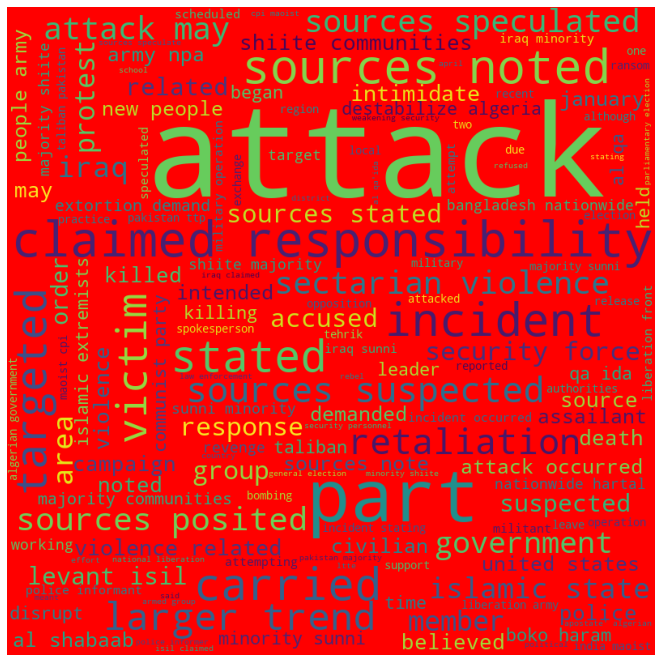

In [25]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) 
stopwords.add('unknown')
stopwords.add('motive')
stopwords.add('specific')
stopwords.add('.')
stopwords.add(',')
stopwords.add(';')
data.Motive.fillna("", inplace = True) 
comment_words = ''

for val in data.Motive: 
    if val == '':
        continue
    val = str(val) 
    val = val.lower()
    comment_words = comment_words + ' ' + val
    
 


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='red', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 

                       
plt.figure(figsize = (9,9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [20]:
!pip install xgboost

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [22]:
data= pd.read_csv(r"C:\Users\rashm\OneDrive\Desktop\5082\TerrorismP.csv", encoding='ISO-8859-1', low_memory=False)
data = data.rename(
columns={'iyear':'year', 'country':'country', 'natlty1':'nationality', 'success':'success','targtype1':'target', 'region' : 'region',
         'weaptype1':'weapon', 'attacktype1':'attack',
         'suicide':'suicide', 'imonth' : 'month'})


dataf=data[data['year']>1999]

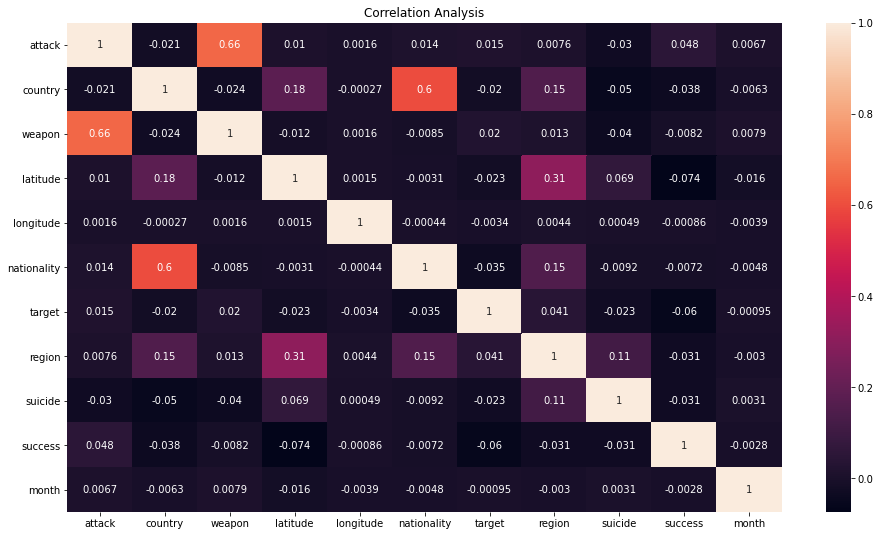

In [29]:
corr = data[['attack', 'country', 'weapon', 'latitude','longitude','nationality','target','region',
            'suicide','success', 'month']].corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot = True)

plt.title('Correlation Analysis')
plt.show()

In [23]:
dataf['success'].astype('str')
dataf.groupby('success').describe()

eventid                                                          \
           count          mean           std           min           25%   
success                                                                    
0        14169.0  2.013516e+11  3.762782e+08  2.000010e+11  2.012120e+11   
1        97686.0  2.012138e+11  4.170609e+08  2.000010e+11  2.010040e+11   

                                                      year               ...  \
                  50%           75%           max    count         mean  ...   
success                                                                  ...   
0        2.015010e+11  2.016060e+11  2.017120e+11  14169.0  2013.450632  ...   
1        2.013110e+11  2.015080e+11  2.017120e+11  97686.0  2012.073183  ...   

        INT_MISC       INT_ANY                                               
             75%  max    count      mean       std  min  25%  50%  75%  max  
success                                                                      
0            0.0  1.0  14169.0 -5.013339  4.684713 -9.0 -9.0 -9.0  0.0  1.0  
1            0.0  1.0  97686.0 -4.506019  4.691537 -9.0 -9.0 -9.0  0.0  1.0  

[2 rows x 608 columns]

In [27]:
dataf['success'].astype('float')
datanew = dataf[dataf['success']==1].sample(n=22000)
data1 = pd.concat([datanew, dataf[dataf['success'] == 0]])


success=pd.DataFrame(data1['success'])
features = pd.DataFrame(data1[['attack', 'country', 'weapon', 'latitude',
          'longitude','nationality','target','region','suicide', 'month']])
features.fillna(features.mean(), inplace=True)
features['latitude'].astype(float)
features['longitude'].astype(float)
features['nationality'].astype(float)
features['month'].astype(float)
print(features)


        attack  country  weapon   latitude   longitude  nationality  target  \
119622       3       95       6  33.303566   44.371773         95.0      14   
134983       7      214       5  47.927954   37.371645        214.0       9   
95826        3       92       6  23.744186   84.504429         92.0      19   
73274        3      603       6  55.011562   -7.312045        233.0      22   
99532        2       92       5  23.346597   86.009606         92.0       2   
...        ...      ...     ...        ...         ...          ...     ...   
181650       3      153       6  30.200819   66.994354        153.0      20   
181674       9       95      13  36.045059   41.716717         95.0       4   
181679       2       95       5  33.953167   44.921906         95.0       4   
181689       3       92       6  24.798346   93.940430         92.0       2   
181690       3      160       6   7.209594  124.241966        160.0      20   

        region  suicide  month  
119622      10    

In [28]:
#first the features data is spilt into training =85% and testong=15% and target data which is the attribute "Success" of attack ' is split into 85% and 15% of training and testing data respectively.  

features_train, features_test,target_train, target_test = train_test_split(features,success, test_size = 0.2,random_state=0)

target_test['success'].astype('str')
print(target_test.groupby('success').size())
target_test['success'].astype('float')

success
0    2884
1    4350
dtype: int64


176143    0.0
157697    0.0
97146     1.0
100957    1.0
119024    1.0
         ... 
91989     0.0
117553    1.0
142637    0.0
138013    1.0
169329    0.0
Name: success, Length: 7234, dtype: float64

In [29]:
ds = features_test.join(target_test)

sds = ds[ds['success']==1].sample(n=2884)
featureds = pd.concat([sds, ds[ds['success'] == 0]])

target_test = featureds['success']
print(target_test)
features_test = featureds.drop(['success'], axis=1)
features_test

146827    1
90562     1
179860    1
128756    1
168519    1
         ..
123158    0
163281    0
91989     0
142637    0
169329    0
Name: success, Length: 5768, dtype: int64


,attack,country,weapon,latitude,longitude,nationality,target,region,suicide,month
146827,6,92,5,18.791402,80.816640,92.0,3,6,0,4
90562,2,153,5,34.792160,72.284279,153.0,12,6,0,2
179860,9,182,13,10.120385,49.691137,182.0,14,11,0,10
128756,6,147,5,4.885824,6.940821,147.0,10,11,0,3
168519,9,95,13,35.525556,43.261111,95.0,14,10,0,10
...,...,...,...,...,...,...,...,...,...,...
123158,1,95,6,33.303566,44.371773,95.0,2,10,0,11
163281,3,95,6,33.036390,40.283332,95.0,20,10,0,6
91989,3,160,6,8.004674,124.291300,160.0,19,5,0,5
142637,3,153,6,34.158333,71.773333,153.0,19,6,0,1


In [30]:
train = xgb.DMatrix(features_train, label = target_train)
test = xgb.DMatrix(features_test, label = target_test)

In [31]:
from sklearn.model_selection import GridSearchCV
gsc = GridSearchCV(
    estimator=xgb.XGBClassifier(),
    param_grid={
               
                'gamma': [0.5, 1, 1.5, 2, 5],
                'subsample': [0.6, 0.8, 1.0],
               
                'max_depth': [3, 4, 5,6],
                
                },
    n_jobs=-1, 
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=100
  )

grid_result = gsc.fit(features_train, target_train)
best_params = grid_result.best_params_
print(best_params)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   

KeyboardInterrupt: 

In [32]:
param = { 'max_depth': 6 , 'subsample': 0.5, 'num_class' : 2}

epoch = 10
model = xgb.train(param, train, epoch)


[17:08:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [33]:
xgpred = model.predict(test)
#print(xgpred)
print("XGBoost accuracy score: " )
print(accuracy_score(target_test, xgpred))

XGBoost accuracy score: 
0.7304091539528432


[[1582 1302]
 [ 253 2631]]


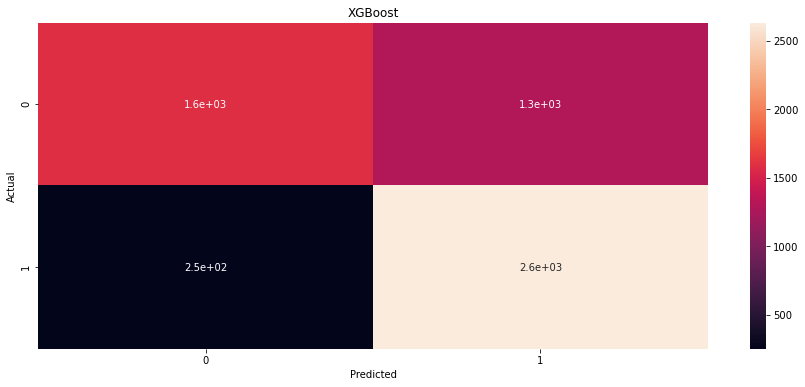

In [34]:
xgconfm = confusion_matrix(target_test, xgpred)
print(xgconfm)
plt.figure(figsize=(15,6))
sns.heatmap(xgconfm, annot = True
           )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost')
plt.show()

In [35]:
xgprecision = xgconfm[1][1]/(xgconfm[1][1]+xgconfm[0][1])
print("Precison is ", xgprecision)

Precison is  0.6689549961861174


AUC of XgBoost = 0.7304


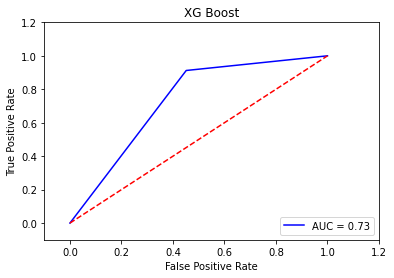

In [36]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, xgpred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC of XgBoost = %0.4f'% roc_auc)
plt.title('XG Boost')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(target_test, xgpred, average='macro')

(0.7655401683927863, 0.7304091539528432, 0.7211874145209256, None)

In [ ]:
Random forest model

In [38]:
randomf= RandomForestClassifier(n_estimators=10)
randomf = randomf.fit( features_train, target_train.values.ravel()  )
print("Random Forest accuracy score: " )
print(randomf.score(features_test,target_test))
predict = randomf.predict(features_test)

Random Forest accuracy score: 
0.7586685159500693


[[2022  862]
 [ 530 2354]]


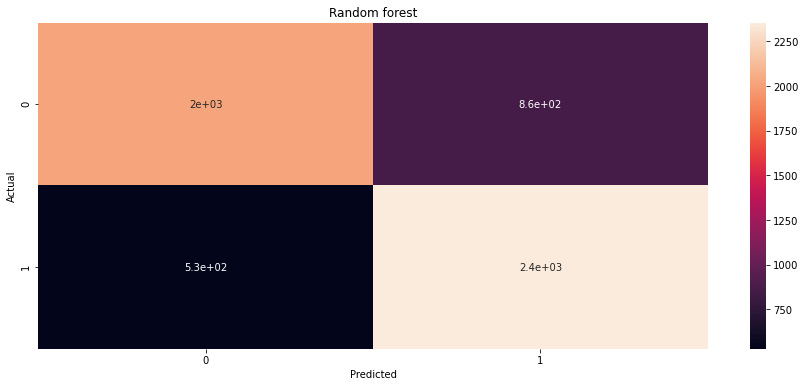

In [40]:
confm = confusion_matrix(target_test, predict)
print(confm)
plt.figure(figsize=(15,6))
sns.heatmap(confm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random forest')
plt.show()

In [41]:
precision = confm[1][1]/(confm[1][1]+confm[0][1])
print ("Precision of Random forest", precision)

Precision of Random forest 0.7319651741293532


AUC of Random Forest = 0.7587


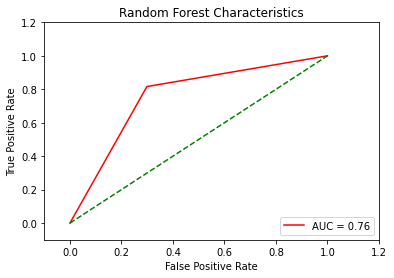

In [42]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC of Random Forest = %0.4f'% roc_auc)
plt.title('Random Forest Characteristics')
plt.plot(false_positive_rate, true_positive_rate, 'r',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'g--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
precision_recall_fscore_support(target_test, predict, average='macro')

(0.7621424616728272, 0.7586685159500693, 0.7578663192559622, None)

In [44]:
randomf.predict([[3,217,6,33.21659, -97.13162 ,217 ,14,1,1,4]])


array([0], dtype=int64)